<a href="https://colab.research.google.com/github/Hieudo02/AI-Exercise/blob/main/buoi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1ba9f78716c13a45eb27dc04b66b19483b5b2977883bcc66c02ef443b61a280c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

x = np.arange(50, 81, 1) #buoc nhay 1
slow = fuzz.trimf(x,[50,50,60])

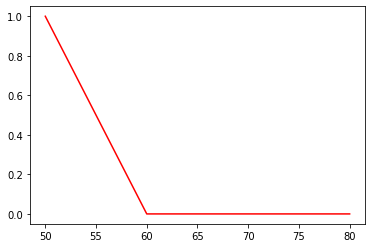

In [4]:
plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'slow')

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

In [10]:
#ham lien thuoc
food['poor'] = fuzz.trimf(food.universe, [0,0,5]) #0,0,5 la gia tri cua tam giac
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])

service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])

tip['less'] = fuzz.trimf(tip.universe, [0,0,5])
tip['average'] = fuzz.trimf(tip.universe, [0,5,10])
tip['much'] = fuzz.trimf(tip.universe, [5,10,10])

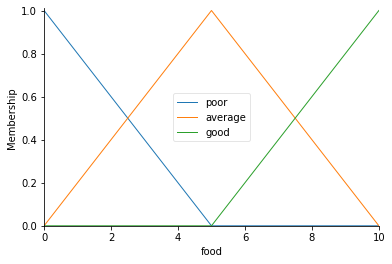

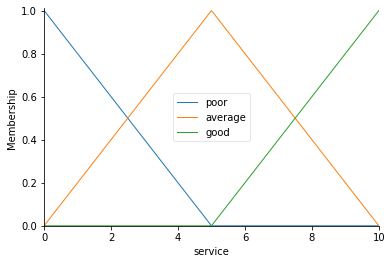

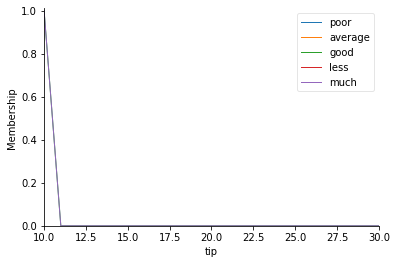

In [11]:
#ve~ pho^? 
food.view()
service.view()
tip.view()

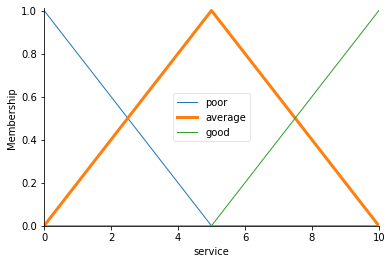

In [9]:
#Ve~ cu. the
service['average'].view()

In [22]:
#make rule
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['less'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['average'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['average'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['average'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['much'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['average'], tip['much'])

10.333333333333334


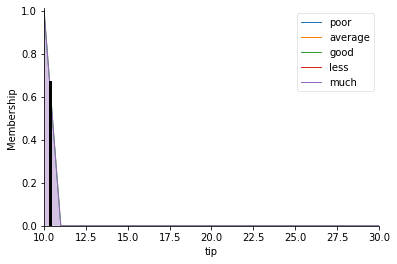

In [23]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]) #thu thap du lieu (can day gi thi dua vao)
tipping = ctrl.ControlSystemSimulation(tipping_ctrl) #hoc du lieu cua tipping_ctrl

tipping.input['food'] = 10
tipping.input['service'] = 0
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

42.325853873499


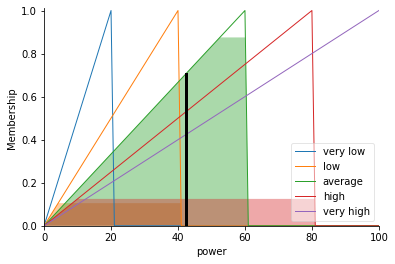

In [26]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

time = ctrl.Antecedent(np.arange(100,2001,1), 'time')
rice = ctrl.Antecedent(np.arange(100,2001,1), 'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

#ham lien thuoc
time['ultra fast'] = fuzz.trimf(time.universe, [10,10,90]) 
time['very fast'] = fuzz.trimf(time.universe, [10,90,170])
time['fast'] = fuzz.trimf(time.universe, [90,170,250])
time['slow'] = fuzz.trimf(time.universe, [170,250,300])
time['very slow'] = fuzz.trimf(time.universe, [250,300,300])

rice['least'] = fuzz.trimf(rice.universe, [100,100,575])
rice['less'] = fuzz.trimf(rice.universe, [100,575,1050])
rice['average'] = fuzz.trimf(rice.universe, [575,1050,1525])
rice['much'] = fuzz.trimf(rice.universe, [1050,1525,2000])
rice['most'] = fuzz.trimf(rice.universe, [1525,2000,2000])

power['very low'] = fuzz.trimf(power.universe, [0,20,20])
power['low'] = fuzz.trimf(power.universe, [0,40,40])
power['average'] = fuzz.trimf(power.universe, [0,60,60])
power['high'] = fuzz.trimf(power.universe, [0,80,80])
power['very high'] = fuzz.trimf(power.universe, [0,100,100])

#make rule
rule1 = ctrl.Rule(time['ultra fast'] & rice['least'], power['very low'])
rule2 = ctrl.Rule(time['ultra fast'] & rice['less'], power['very low'])
rule3 = ctrl.Rule(time['ultra fast'] & rice['average'], power['low'])
rule4 = ctrl.Rule(time['ultra fast'] & rice['much'], power['low'])
rule5 = ctrl.Rule(time['ultra fast'] & rice['most'], power['average'])

rule6 = ctrl.Rule(time['very fast'] & rice['least'], power['low'])
rule7 = ctrl.Rule(time['very fast'] & rice['less'], power['low'])
rule8 = ctrl.Rule(time['very fast'] & rice['average'], power['average'])
rule9 = ctrl.Rule(time['very fast'] & rice['much'], power['average'])
rule10 = ctrl.Rule(time['very fast'] & rice['most'], power['high'])

rule11 = ctrl.Rule(time['fast'] & rice['least'], power['average'])
rule12 = ctrl.Rule(time['fast'] & rice['less'], power['average'])
rule13 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule14 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['fast'] & rice['most'], power['very high'])

rule16 = ctrl.Rule(time['slow'] & rice['least'], power['high'])
rule17 = ctrl.Rule(time['slow'] & rice['less'], power['high'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['very high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['very high'])
rule20 = ctrl.Rule(time['slow'] & rice['most'], power['very high'])

rule21 = ctrl.Rule(time['very slow'] & rice['least'], power['high'])
rule22 = ctrl.Rule(time['very slow'] & rice['less'], power['high'])
rule23 = ctrl.Rule(time['very slow'] & rice['average'], power['very high'])
rule24 = ctrl.Rule(time['very slow'] & rice['much'], power['very high'])
rule25 = ctrl.Rule(time['very slow'] & rice['most'], power['very high'])


power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, 
                                 rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
                                 rule21, rule22, rule23, rule24, rule25]) 
powering = ctrl.ControlSystemSimulation(power_ctrl) 

powering.input['time'] = 100
powering.input['rice'] = 1000
powering.compute()
print(powering.output['power'])
power.view(sim = powering)